In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import numpy as np
import keras
from sklearn.manifold import TSNE
# processing imports
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('iot23_combined.csv')

In [3]:
del df['Unnamed: 0']

In [4]:
binary_attack = df.label.map(lambda a: 0 if a == 'Benign' else 1)


df['label'] = binary_attack


# view the result
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df['label'].value_counts()

1    1246865
0     197809
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

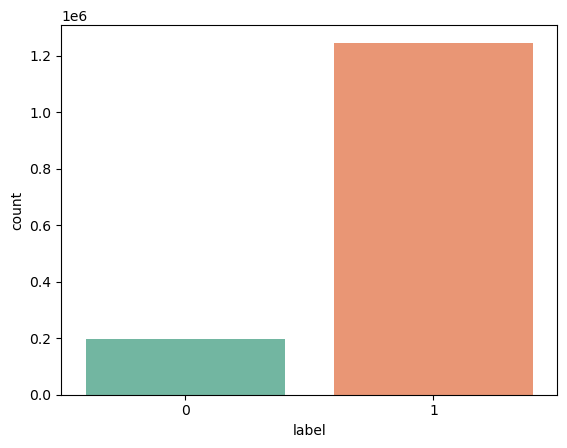

In [6]:
sns.countplot(x='label', data=df, palette='Set2')

In [6]:
df['missed_bytes'].value_counts()

0.0        1444620
2896.0          12
1448.0          10
5792.0           6
10136.0          5
4344.0           3
7240.0           2
13032.0          2
2920.0           2
2472.0           2
1460.0           1
1579.0           1
5390.0           1
4500.0           1
15928.0          1
1582.0           1
20272.0          1
8688.0           1
17376.0          1
11584.0          1
Name: missed_bytes, dtype: int64

In [7]:
df['conn_state_RSTO'].value_counts()

0    1444521
1        153
Name: conn_state_RSTO, dtype: int64

In [8]:
df['conn_state_RSTOS0'].value_counts()

0    1444644
1         30
Name: conn_state_RSTOS0, dtype: int64

In [9]:
df['conn_state_RSTR'].value_counts()

0    1444123
1        551
Name: conn_state_RSTR, dtype: int64

In [10]:
df['conn_state_S2'].value_counts()

0    1444647
1         27
Name: conn_state_S2, dtype: int64

In [11]:
df['conn_state_S3'].value_counts()

0    1442217
1       2457
Name: conn_state_S3, dtype: int64

Exceessive A single value dominated columns are dropped

In [7]:
df.drop('missed_bytes',axis = 1,inplace = True)
df.drop('conn_state_RSTO',axis = 1,inplace = True)
df.drop('conn_state_RSTOS0',axis = 1,inplace = True)
df.drop('conn_state_RSTR',axis = 1,inplace = True)
df.drop('conn_state_RSTRH',axis = 1,inplace = True)
df.drop('conn_state_S2',axis = 1,inplace = True)
df.drop('conn_state_S3',axis = 1,inplace = True)
df.drop('conn_state_SF',axis = 1,inplace = True)
df.drop('conn_state_SH',axis = 1,inplace = True)
df.drop('conn_state_SHR',axis = 1,inplace = True)

In [12]:
df['conn_state_OTH'].value_counts()

0    1327304
1     117370
Name: conn_state_OTH, dtype: int64

In [13]:
df['conn_state_S0'].value_counts()

1    1305208
0     139466
Name: conn_state_S0, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444674 entries, 0 to 1444673
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   duration        1444674 non-null  float64
 1   orig_bytes      1444674 non-null  int64  
 2   resp_bytes      1444674 non-null  int64  
 3   orig_pkts       1444674 non-null  float64
 4   orig_ip_bytes   1444674 non-null  float64
 5   resp_pkts       1444674 non-null  float64
 6   resp_ip_bytes   1444674 non-null  float64
 7   label           1444674 non-null  int64  
 8   proto_icmp      1444674 non-null  int64  
 9   proto_tcp       1444674 non-null  int64  
 10  proto_udp       1444674 non-null  int64  
 11  conn_state_OTH  1444674 non-null  int64  
 12  conn_state_REJ  1444674 non-null  int64  
 13  conn_state_S0   1444674 non-null  int64  
 14  conn_state_S1   1444674 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 165.3 MB


In [285]:
df.describe()

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
count,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06
mean,3.060814e-01,2.725242e+03,1.801278e+01,1.780510e+02,7.745525e+03,1.257785e-01,2.846040e+01,8.630771e-01,2.527214e-03,9.603558e-01,3.711702e-02,8.124324e-02,1.881393e-03,9.034620e-01,3.322549e-05
std,8.568446e+01,1.714763e+06,9.726978e+03,7.230421e+04,2.849409e+06,1.547444e+01,1.014930e+04,3.437661e-01,5.020785e-02,1.951220e-01,1.890486e-01,2.732084e-01,4.333422e-02,2.953278e-01,5.764062e-03
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,4.897682e+04,1.744830e+09,1.166102e+07,6.602735e+07,1.914793e+09,9.307000e+03,1.207699e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
df.std()

duration          8.568446e+01
orig_bytes        1.714763e+06
resp_bytes        9.726978e+03
orig_pkts         7.230421e+04
orig_ip_bytes     2.849409e+06
resp_pkts         1.547444e+01
resp_ip_bytes     1.014930e+04
label             3.437661e-01
proto_icmp        5.020785e-02
proto_tcp         1.951220e-01
proto_udp         1.890486e-01
conn_state_OTH    2.732084e-01
conn_state_REJ    4.333422e-02
conn_state_S0     2.953278e-01
conn_state_S1     5.764062e-03
dtype: float64

In [10]:
df.iloc[:,0:5].describe()

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes
count,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06
mean,3.060814e-01,2.725242e+03,1.801278e+01,1.780510e+02,7.745525e+03
std,8.568446e+01,1.714763e+06,9.726978e+03,7.230421e+04,2.849409e+06
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,4.000000e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01
75%,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01
max,4.897682e+04,1.744830e+09,1.166102e+07,6.602735e+07,1.914793e+09


In [11]:
8.568446e+01

85.68446

In [12]:
df.shape

(1444674, 15)

In [13]:
df_train,df_test=train_test_split(df, test_size=0.25, random_state=42)

In [14]:
df_train.shape

(1083505, 15)

In [15]:
df_test.shape

(361169, 15)

In [16]:
x = df_train.drop(["label"], axis=1)
y = df_train["label"].values

In [17]:
x.shape

(1083505, 14)

In [18]:
#train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

In [19]:
#train_x.shape

Deep Neural Network

In [20]:
#Using Neural Networks
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(x.shape[1],)))

model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()
model.fit(x, y,batch_size=100,epochs=5)
#model.fit(train_x, train_y,batch_size=100,epochs=5,validation_data=(test_x,test_y))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1500      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 40)                2040      
                                                                 
 dense_3 (Dense)             (None, 40)                1640      
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 10,271
Trainable params: 10,271
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10836/10836 [=============================

In [235]:
x_norm= x[y == 0]

In [236]:
x_norm.shape

(148534, 14)

In [237]:
x_norm.head()

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
523144,3.103243,0,0,3.0,180.0,0.0,0.0,0,1,0,0,0,1,0
463140,0.000000,0,0,1.0,60.0,0.0,0.0,0,1,0,0,0,1,0
527540,0.000000,0,0,1.0,60.0,0.0,0.0,0,1,0,0,0,1,0
763709,0.000000,0,0,1.0,40.0,0.0,0.0,0,1,0,0,0,1,0
441071,0.000000,0,0,1.0,60.0,0.0,0.0,0,1,0,0,0,1,0


In [238]:
stds=x_norm.std()

In [239]:
type(stds)

pandas.core.series.Series

In [240]:
stds

duration          7.811515e+01
orig_bytes        7.487180e+04
resp_bytes        3.027839e+04
orig_pkts         3.716726e+04
orig_ip_bytes     1.081467e+06
resp_pkts         2.097329e+01
resp_ip_bytes     3.135858e+04
proto_icmp        1.353301e-01
proto_tcp         4.535612e-01
proto_udp         4.444265e-01
conn_state_OTH    1.363318e-01
conn_state_REJ    9.317874e-02
conn_state_S0     2.857959e-01
conn_state_S1     1.397157e-02
dtype: float64

In [241]:
stds=0.1*stds.to_numpy()

In [242]:
stds

array([7.81151539e+00, 7.48717992e+03, 3.02783866e+03, 3.71672610e+03,
       1.08146669e+05, 2.09732871e+00, 3.13585761e+03, 1.35330086e-02,
       4.53561235e-02, 4.44426540e-02, 1.36331814e-02, 9.31787359e-03,
       2.85795943e-02, 1.39715671e-03])

In [243]:
#stddevs = tf.constant(stds)

In [244]:
mns=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [245]:
import random 
#seed_value = random.randint(1,256)
#tf.random.set_seed(seed_value)
#random_noise=tf.random.normal(shape = (148534,14), mean=mns, stddev=stds, dtype=tf.float64,  name=None)

In [246]:
def random_val():
    seed_value = random.randint(1,256)
    tf.random.set_seed(seed_value)
    random_noise=tf.random.normal(shape = (148534,14), mean=mns, stddev=stds, dtype=tf.float64,  name=None)
    return random_noise
    

In [247]:
x_norm1=pd.DataFrame(x_norm)
x_norm1.shape

(148534, 14)

In [248]:
import random 
random_data =random_val()
random_noise=random_data.numpy()
x_norm=pd.DataFrame(x_norm)
normal_labeled=x_norm
noised_data=normal_labeled+random_noise
pseudo_label=model.predict(noised_data)
pseudo_labeled_data=pd.DataFrame(noised_data)
pseudo_labeled_data['label']=pseudo_label
pseudo_labeled_data=pd.DataFrame(pseudo_labeled_data)
new_df=pseudo_labeled_data.loc[pseudo_labeled_data['label'] == 0]
new_df.shape[0]
new_df['label'].value_counts()

4642/4642 [==============================] - 3s 570us/step


0.0    31327
Name: label, dtype: int64

In [249]:
new_df["label"].value_counts()

0.0    31327
Name: label, dtype: int64

In [250]:
def norm_data():
    random_data =random_val()
    random_noise=random_data.numpy()
    x_norm1=pd.DataFrame(x_norm)
    normal_labeled=x_norm1
    noised_data=normal_labeled+random_noise
    pseudo_label=model.predict(noised_data)
    pseudo_labeled_data=pd.DataFrame(noised_data)
    pseudo_labeled_data['label']=pseudo_label
    pseudo_df1=pseudo_labeled_data.loc[pseudo_labeled_data['label'] == 0]
    return pseudo_df1
    
pseudo_df2=norm_data() 
pseudo_df2.shape[0]

4642/4642 [==============================] - 3s 562us/step


31491

In [251]:
pseudo_df2["label"].value_counts()

0.0    31491
Name: label, dtype: int64

In [252]:
#combined_data = pd.concat([df_train,pseudo_df2])

In [253]:
#combined_data['label'].value_counts()

In [254]:
new_normal_df=pd.DataFrame(pseudo_df2)
print(new_normal_df.shape[0])
i=0
#while new_normal_df.shape[0] < 934971:
while i < 25:
    pseudo_df3=norm_data()
    print(pseudo_df3.shape[0])
    #new_normal_df=pseudo_df3.shape[0]
    new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)
    combined_data = pd.concat([df_train,new_normal_df])
    print(new_normal_df.shape[0])
    i=i+1
    
print(i)   
new_normal_df.shape[0]

31491
4642/4642 [==============================] - 3s 569us/step
31310
62801


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 574us/step
31336
94137


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 587us/step
31302
125439


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 573us/step
31108
156547


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 589us/step
31040
187587


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 588us/step
31275
218862


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 601us/step
31067
249929


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 625us/step
31274
281203


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 603us/step
31446
312649


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 556us/step
30985
343634


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 600us/step
31414
375048


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 662us/step
31247
406295


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 622us/step
31161
437456


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 573us/step
31415
468871


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 565us/step
31406
500277


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 597us/step
31019
531296


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 563us/step
31427
562723


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 564us/step
31327
594050


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 559us/step
31311
625361


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 596us/step
31300


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


656661
4642/4642 [==============================] - 3s 738us/step
31089
687750


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 587us/step
31301
719051


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 668us/step
31437


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


750488
4642/4642 [==============================] - 3s 579us/step
31483
781971


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


4642/4642 [==============================] - 3s 566us/step
31245
813216
25


C:\Users\12403\AppData\Local\Temp\ipykernel_23892\772791319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_normal_df = new_normal_df.append(pseudo_df3, ignore_index = True)


813216

In [255]:
#new_normal_df1=new_normal_df

In [256]:
#combined_data1 = pd.concat([df_train,new_normal_df1])

In [257]:
df_train['label'].value_counts()

1    934971
0    148534
Name: label, dtype: int64

In [258]:
combined_data["label"].value_counts()

0.0    961750
1.0    934971
Name: label, dtype: int64

In [ ]:
#combined_data.to_csv('balanced_dataset.csv')

In [260]:
df_train.head()

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
523144,3.103243,0,0,3.0,180.0,0.0,0.0,0,0,1,0,0,0,1,0
1082693,-1.000000,-1,-1,2.0,80.0,0.0,0.0,1,0,1,0,0,0,1,0
856694,-1.000000,-1,-1,6.0,360.0,0.0,0.0,1,0,1,0,0,0,1,0
145533,-1.000000,-1,-1,2.0,80.0,0.0,0.0,1,0,1,0,0,0,1,0
927896,-1.000000,-1,-1,2.0,120.0,0.0,0.0,1,0,1,0,0,0,1,0


In [261]:
combined_data.shape

(1896721, 15)

In [262]:
combined_data.head()

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
523144,3.103243,0.0,0.0,3.0,180.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1082693,-1.000000,-1.0,-1.0,2.0,80.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
856694,-1.000000,-1.0,-1.0,6.0,360.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
145533,-1.000000,-1.0,-1.0,2.0,80.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
927896,-1.000000,-1.0,-1.0,2.0,120.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [263]:
combined_data['label'].value_counts()

0.0    961750
1.0    934971
Name: label, dtype: int64

In [ ]:
sns.countplot(x='label', data=combined_data, palette='Set2')

In [286]:
df.describe()

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
count,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06
mean,3.060814e-01,2.725242e+03,1.801278e+01,1.780510e+02,7.745525e+03,1.257785e-01,2.846040e+01,8.630771e-01,2.527214e-03,9.603558e-01,3.711702e-02,8.124324e-02,1.881393e-03,9.034620e-01,3.322549e-05
std,8.568446e+01,1.714763e+06,9.726978e+03,7.230421e+04,2.849409e+06,1.547444e+01,1.014930e+04,3.437661e-01,5.020785e-02,1.951220e-01,1.890486e-01,2.732084e-01,4.333422e-02,2.953278e-01,5.764062e-03
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,4.897682e+04,1.744830e+09,1.166102e+07,6.602735e+07,1.914793e+09,9.307000e+03,1.207699e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [287]:
combined_data.describe()

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
count,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06
mean,9.939172e-01,2.259415e+03,1.204505e+03,9.447143e+01,4.002427e+04,1.379072e-01,6.307683e+00,4.929407e-01,9.450286e-03,8.531721e-01,1.373458e-01,5.463121e-02,4.757778e-03,9.055445e-01,9.985138e-05
std,1.170665e+02,1.498276e+06,8.714049e+03,6.186901e+04,2.462160e+06,1.041766e+01,9.106090e+03,4.999503e-01,9.717652e-02,3.551985e-01,3.454452e-01,2.274508e-01,6.911150e-02,2.930604e-01,1.004894e-02
min,-3.838919e+01,-3.375736e+04,-5.478376e+03,-1.773872e+04,-2.536385e+04,-9.626610e+00,-1.542204e+04,0.000000e+00,-6.330904e-02,-1.872771e-01,-2.088951e-01,-6.682470e-02,-4.703961e-02,-1.259615e-01,-6.198886e-03
25%,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.811442e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.927470e-01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.600000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.663869e+00,0.000000e+00,2.077302e+03,3.000000e+00,5.474316e+04,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.587415e-02,1.217598e-03,0.000000e+00,1.000000e+00,0.000000e+00
max,4.897682e+04,1.744830e+09,1.166102e+07,6.602735e+07,1.914793e+09,9.307000e+03,1.207699e+07,1.000000e+00,1.056745e+00,1.212814e+00,1.209808e+00,1.050136e+00,1.037400e+00,1.136759e+00,1.003876e+00


In [267]:
X= combined_data.drop(["label"], axis=1)
Y = combined_data["label"].values
model.fit(X, Y,batch_size=100,epochs=2)

Epoch 1/2
18968/18968 [==============================] - 28s 1ms/step - loss: 3751.0276 - accuracy: 0.9333
Epoch 2/2
18968/18968 [==============================] - 27s 1ms/step - loss: 5892.8638 - accuracy: 0.9222


In [268]:
def report_heatmap(y_pred,y_test):
    
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(y_test, y_pred))
    figsize=(8,5)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [271]:
x_vld= df_test.drop(["label"], axis=1)
y_vld = df_test["label"].values

11287/11287 [==============================] - 6s 557us/step
Overall Accuracy: 93.05%
--------------------------
              precision    recall  f1-score   support

           0       0.91      0.55      0.68     49275
           1       0.93      0.99      0.96    311894

    accuracy                           0.93    361169
   macro avg       0.92      0.77      0.82    361169
weighted avg       0.93      0.93      0.92    361169



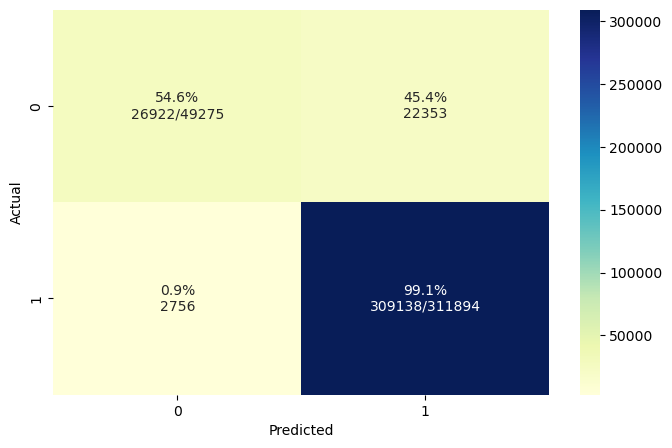

In [288]:
y_pred_NN=(model.predict(x_vld)> 0.5)
report_heatmap(y_pred_NN,y_vld)

11287/11287 [==============================] - 7s 576us/step
Overall Accuracy: 90.49%
--------------------------
              precision    recall  f1-score   support

           0       0.61      0.82      0.70     49275
           1       0.97      0.92      0.94    311894

    accuracy                           0.90    361169
   macro avg       0.79      0.87      0.82    361169
weighted avg       0.92      0.90      0.91    361169



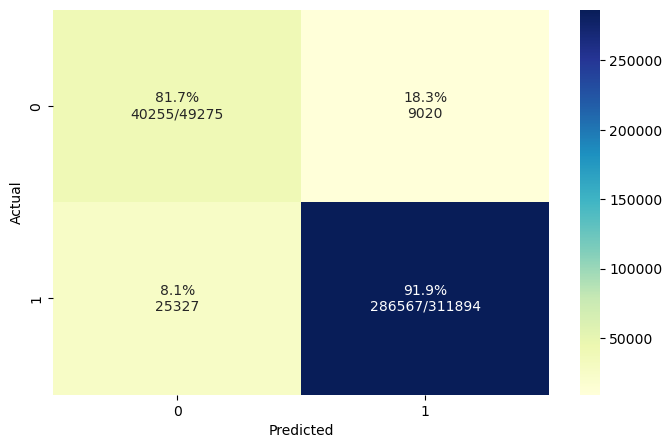

In [283]:
y_pred_NN=(model.predict(x_vld)> 0.8)
report_heatmap(y_pred_NN,y_vld)

In [ ]:
#End